## Open AI Gym Multi Armed Bandit Demo

In [73]:
import gym_bandits
import gym
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
resultsList = []
env = gym.make("BanditTwoArmedHighLowFixed-v0")
#env.p_dist = [0.5,0.5]
print(env.p_dist)

[0.8, 0.2]


In [75]:
epsilon1 = 0.5
epsilon2 = 0.3
epsilon3 = 0.1
num_rounds = 100

## When Epsilon is 0.5

In [76]:
count = np.zeros(2)
sum_rewards = np.zeros(2)
Q = np.zeros(2)
env.reset()

def epsilon_greedy(epsilon):

    if np.random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q)
    
df1 = pd.DataFrame(columns=['Round','Arm','Next State',
                            'Reward','Done','Info','Count[arm]',
                            'Sum Reward[arm]','Q[arm]','Count for Arm 0',
                            'Count for Arm 1','Sum Reward for Arm 0','Sum Reward for Arm 1',
                            'Q for arm 0','Q for arm 1'])

for i in range(num_rounds):
    arm = epsilon_greedy(epsilon=epsilon1)
    next_state, reward, done, info = env.step(arm)
    count[arm] += 1
    sum_rewards[arm]+=reward
    Q[arm] = sum_rewards[arm]/count[arm]
    
    print("Round:           ", i+1)
    print("Arm:             ", arm)
    print("Next State:      ", next_state)
    print("Reward:          ", reward)
    print("Done:            ", done)
    print("Info:            ", info)
    print("Count[arm]:      ", count[arm])
    print("Sum Reward[arm]: ", sum_rewards[arm])
    print("Q[arm]:          ", Q[arm])
    
    if arm == 0:
        Count_for_Arm_0 = count[arm]
        Sum_Reward_for_Arm_0 = sum_rewards[arm]
        Q_for_arm_0 = Q[arm]
        
    else:
        Count_for_Arm_0 = 0
        Sum_Reward_for_Arm_0 = 0
        Q_for_arm_0 = 0
        
    if arm == 1:
        Count_for_Arm_1 = count[arm]
        Sum_Reward_for_Arm_1 = sum_rewards[arm]
        Q_for_arm_1 = Q[arm]
        
    else:
        Count_for_Arm_1 = 0
        Sum_Reward_for_Arm_1 = 0
        Q_for_arm_1 = 0
        
    print(" ")
    
    infoList = [i+1, arm, next_state, reward, done, info, count[arm], sum_rewards[arm], Q[arm], Count_for_Arm_0, Count_for_Arm_1, Sum_Reward_for_Arm_0, Sum_Reward_for_Arm_1, Q_for_arm_0, Q_for_arm_1]
    
    df1.loc[len(df1)] = infoList

Round:            1
Arm:              0
Next State:       0
Reward:           0
Done:             True
Info:             {}
Count[arm]:       1.0
Sum Reward[arm]:  0.0
Q[arm]:           0.0
 
Round:            2
Arm:              0
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       2.0
Sum Reward[arm]:  1.0
Q[arm]:           0.5
 
Round:            3
Arm:              0
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       3.0
Sum Reward[arm]:  2.0
Q[arm]:           0.6666666666666666
 
Round:            4
Arm:              0
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       4.0
Sum Reward[arm]:  3.0
Q[arm]:           0.75
 
Round:            5
Arm:              0
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       5.0
Sum Reward[arm]:  4.0
Q[arm]:           0.8
 
Round:            6
Arm:

C:\Users\Alan Chow\anaconda3\envs\Reinforcement_learning\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
C:\Users\Alan Chow\anaconda3\envs\Reinforcement_learning\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
C:\Users\Alan Chow\anaconda3\envs\Reinforcement_learning\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'int'>`
  logger.warn(
C:\Users\Alan Chow\anaconda3\envs\Reinforcement_lear

In [77]:
print(Q)
print('The optimal arm is arm {}'.format(np.argmax(Q)))
resultsList.append([Q,np.argmax(Q),epsilon1])

[0.76315789 0.20833333]
The optimal arm is arm 0


#### Epsilon = 0.5 Graph Result

In [78]:
#df1

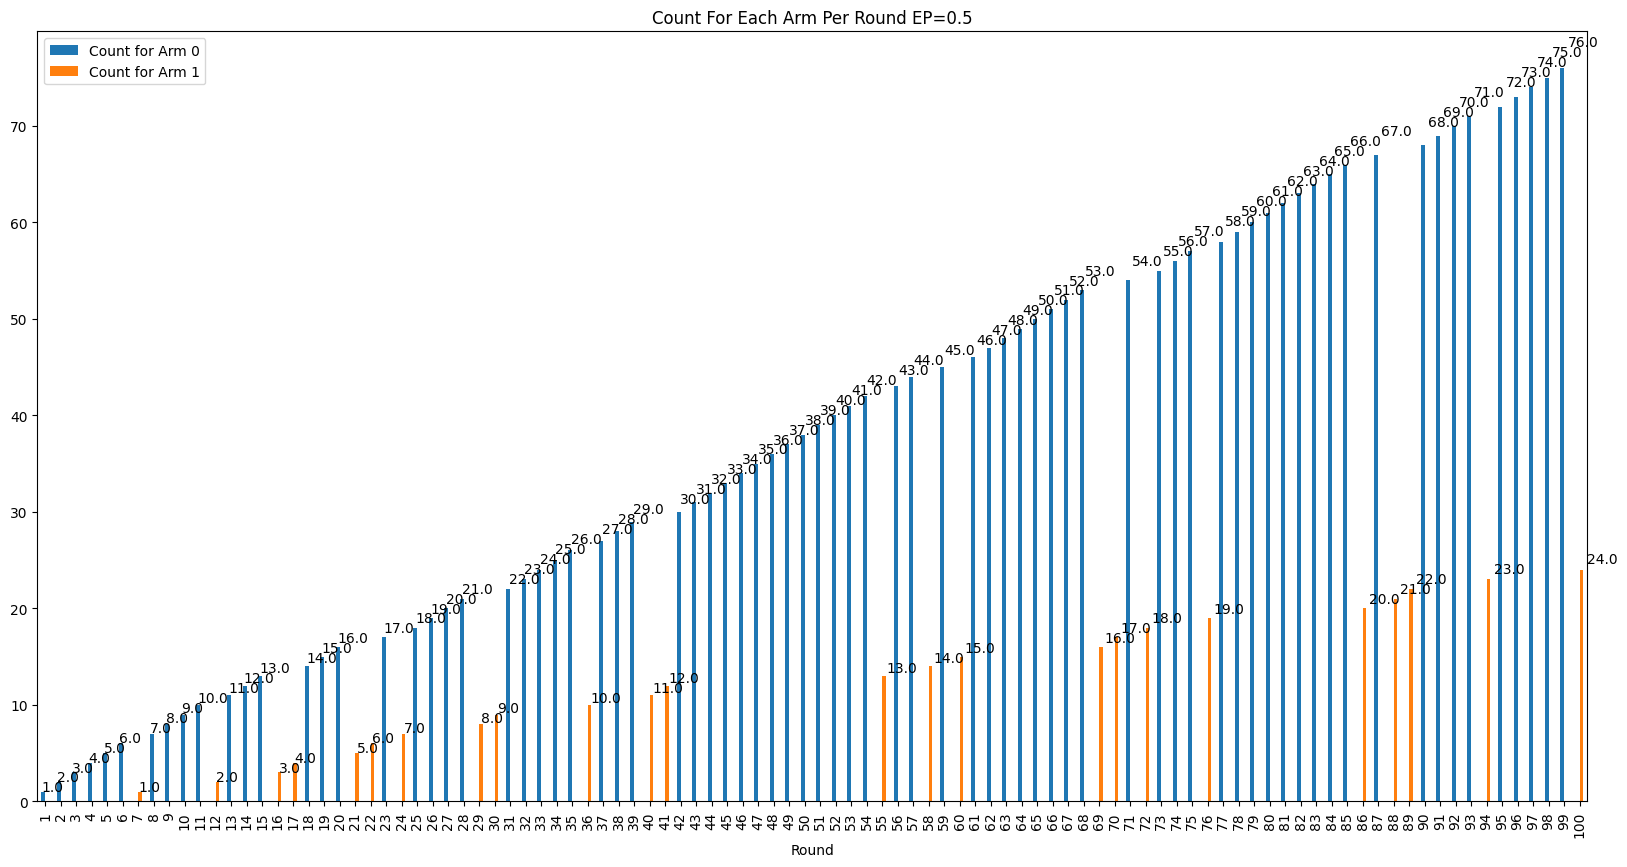

In [79]:
ax = df1.plot(x="Round", y=["Count for Arm 0", "Count for Arm 1"], kind="bar", figsize=(20, 10))
ax.set_title('Count For Each Arm Per Round EP=0.5')
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
plt.show()

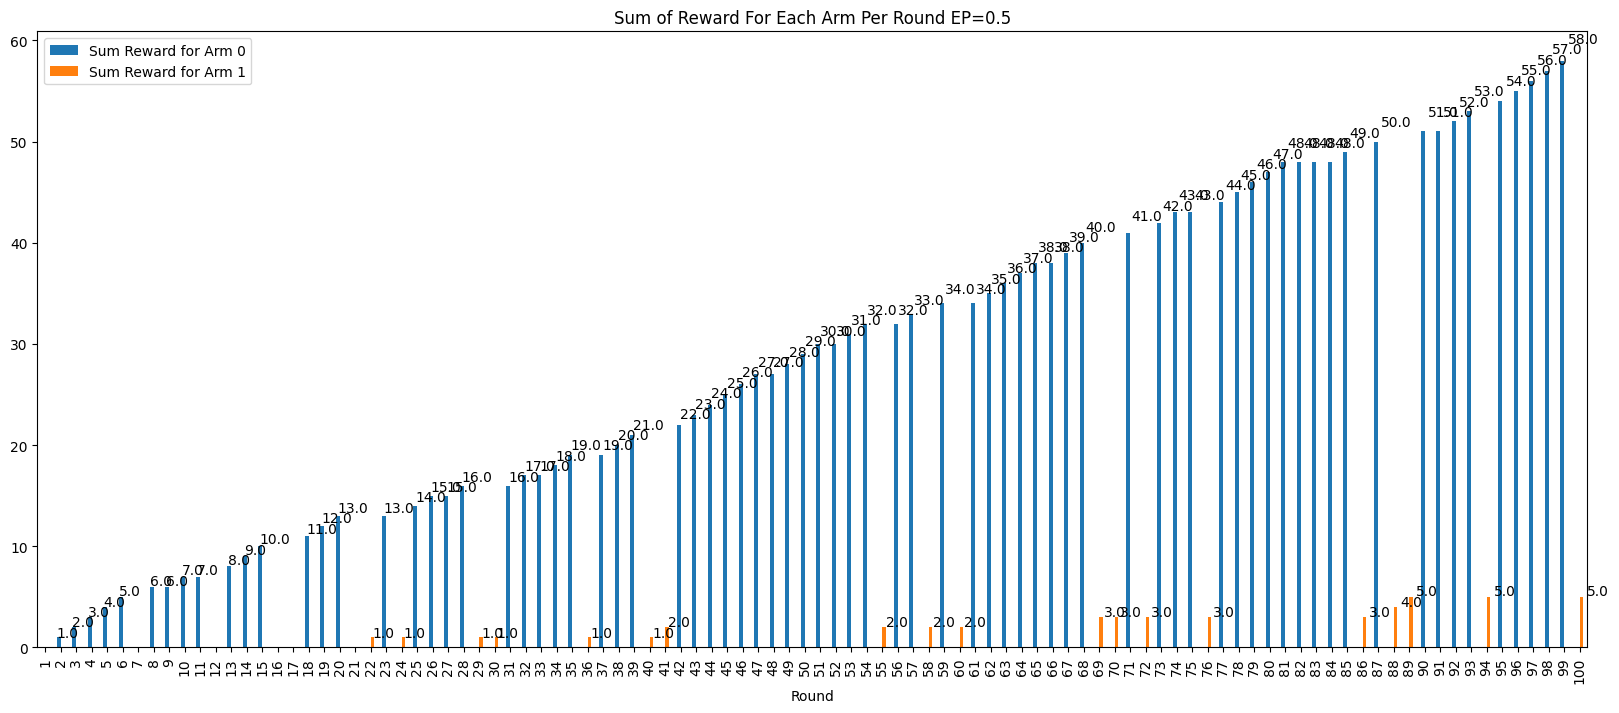

In [80]:
ax = df1.plot(x="Round", y=["Sum Reward for Arm 0", "Sum Reward for Arm 1"], kind="bar", figsize=(20, 8))
ax.set_title('Sum of Reward For Each Arm Per Round EP=0.5')
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
plt.show()

## When Epsilon is 0.3

In [81]:
count = np.zeros(2)
sum_rewards = np.zeros(2)
Q = np.zeros(2)
env.reset()


def epsilon_greedy(epsilon):

    if np.random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q)
    
df1 = pd.DataFrame(columns=['Round','Arm','Next State',
                            'Reward','Done','Info','Count[arm]',
                            'Sum Reward[arm]','Q[arm]','Count for Arm 0',
                            'Count for Arm 1','Sum Reward for Arm 0','Sum Reward for Arm 1',
                            'Q for arm 0','Q for arm 1'])

for i in range(num_rounds):
    arm = epsilon_greedy(epsilon=epsilon2)
    next_state, reward, done, info = env.step(arm)
    count[arm] += 1
    sum_rewards[arm]+=reward
    Q[arm] = sum_rewards[arm]/count[arm]
    
    print("Round:           ", i+1)
    print("Arm:             ", arm)
    print("Next State:      ", next_state)
    print("Reward:          ", reward)
    print("Done:            ", done)
    print("Info:            ", info)
    print("Count[arm]:      ", count[arm])
    print("Sum Reward[arm]: ", sum_rewards[arm])
    print("Q[arm]:          ", Q[arm])
    
    if arm == 0:
        Count_for_Arm_0 = count[arm]
        Sum_Reward_for_Arm_0 = sum_rewards[arm]
        Q_for_arm_0 = Q[arm]
        
    else:
        Count_for_Arm_0 = 0
        Sum_Reward_for_Arm_0 = 0
        Q_for_arm_0 = 0
        
    if arm == 1:
        Count_for_Arm_1 = count[arm]
        Sum_Reward_for_Arm_1 = sum_rewards[arm]
        Q_for_arm_1 = Q[arm]
        
    else:
        Count_for_Arm_1 = 0
        Sum_Reward_for_Arm_1 = 0
        Q_for_arm_1 = 0
        
    print(" ")
    
    infoList = [i+1, arm, next_state, reward, done, info, count[arm], sum_rewards[arm], Q[arm], Count_for_Arm_0, Count_for_Arm_1, Sum_Reward_for_Arm_0, Sum_Reward_for_Arm_1, Q_for_arm_0, Q_for_arm_1]
    
    df1.loc[len(df1)] = infoList

Round:            1
Arm:              0
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       1.0
Sum Reward[arm]:  1.0
Q[arm]:           1.0
 
Round:            2
Arm:              0
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       2.0
Sum Reward[arm]:  2.0
Q[arm]:           1.0
 
Round:            3
Arm:              0
Next State:       0
Reward:           0
Done:             True
Info:             {}
Count[arm]:       3.0
Sum Reward[arm]:  2.0
Q[arm]:           0.6666666666666666
 
Round:            4
Arm:              1
Next State:       0
Reward:           0
Done:             True
Info:             {}
Count[arm]:       1.0
Sum Reward[arm]:  0.0
Q[arm]:           0.0
 
Round:            5
Arm:              0
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       4.0
Sum Reward[arm]:  3.0
Q[arm]:           0.75
 
Round:            6
Arm:

In [82]:
print(Q)
print('The optimal arm is arm {}'.format(np.argmax(Q)))
resultsList.append([Q,np.argmax(Q),epsilon2])

[0.80681818 0.16666667]
The optimal arm is arm 0


#### Epsilon = 0.3 Graph Result

In [83]:
#df1

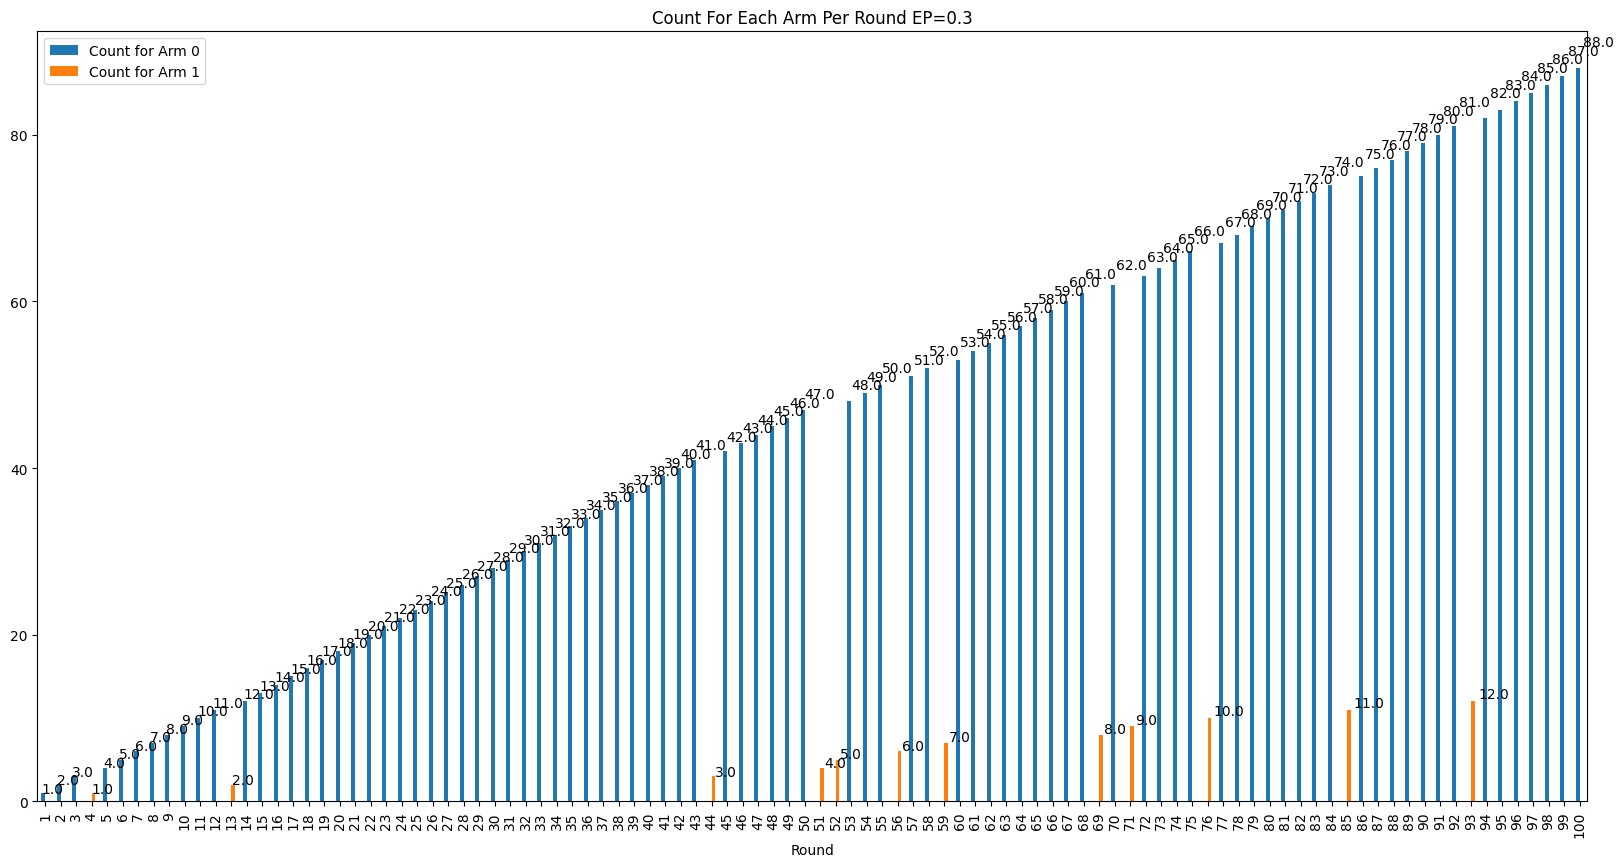

In [84]:
ax = df1.plot(x="Round", y=["Count for Arm 0", "Count for Arm 1"], kind="bar", figsize=(20, 10))
ax.set_title('Count For Each Arm Per Round EP=0.3')
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
plt.show()

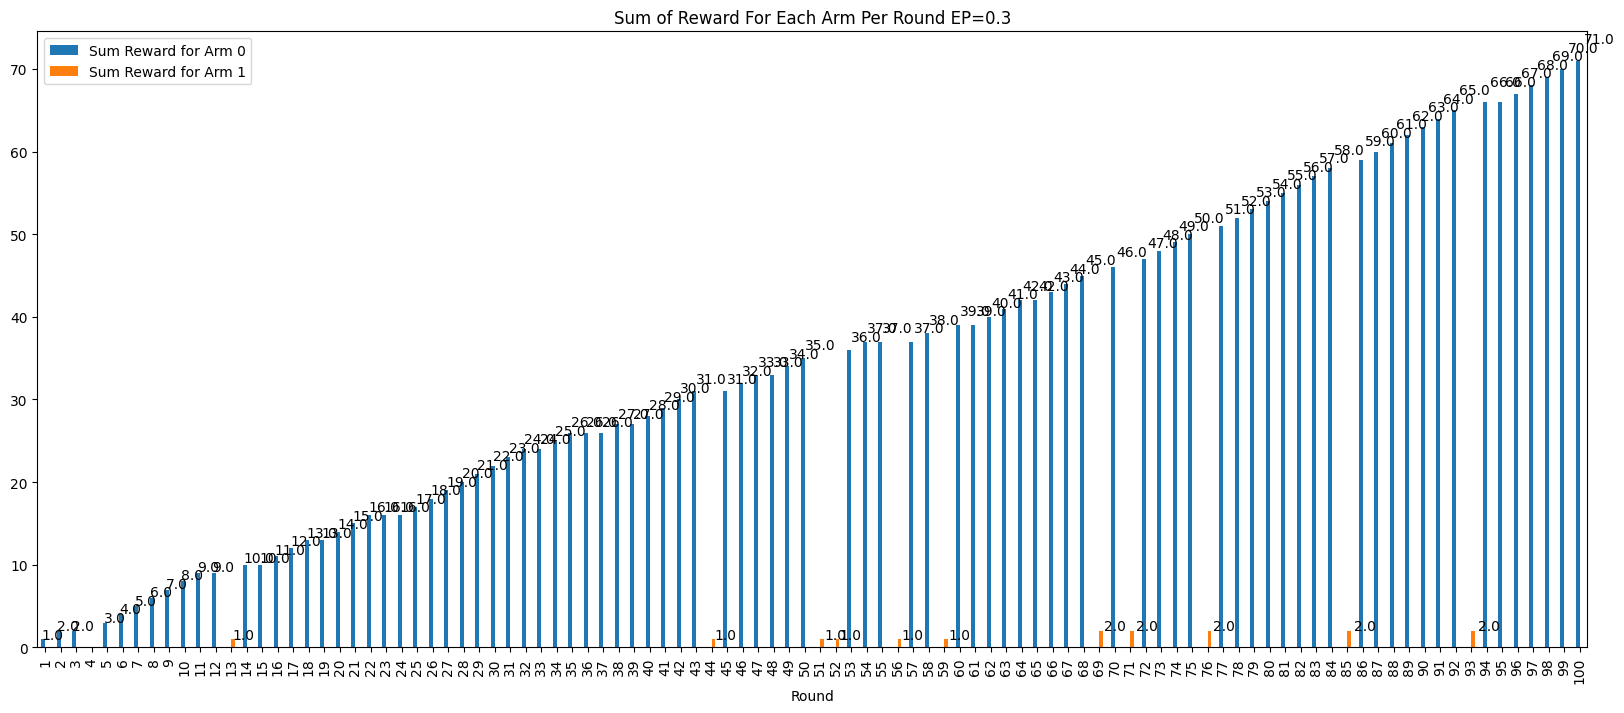

In [85]:
ax = df1.plot(x="Round", y=["Sum Reward for Arm 0", "Sum Reward for Arm 1"], kind="bar", figsize=(20, 8))
ax.set_title('Sum of Reward For Each Arm Per Round EP=0.3')
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
plt.show()

## When Epsilon is 0.1

In [86]:
count = np.zeros(2)
sum_rewards = np.zeros(2)
Q = np.zeros(2)
env.reset()

def epsilon_greedy(epsilon):

    if np.random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q)
    
df1 = pd.DataFrame(columns=['Round','Arm','Next State',
                            'Reward','Done','Info','Count[arm]',
                            'Sum Reward[arm]','Q[arm]','Count for Arm 0',
                            'Count for Arm 1','Sum Reward for Arm 0','Sum Reward for Arm 1',
                            'Q for arm 0','Q for arm 1'])

for i in range(num_rounds):
    arm = epsilon_greedy(epsilon=epsilon3)
    next_state, reward, done, info = env.step(arm)
    count[arm] += 1
    sum_rewards[arm]+=reward
    Q[arm] = sum_rewards[arm]/count[arm]
    
    print("Round:           ", i+1)
    print("Arm:             ", arm)
    print("Next State:      ", next_state)
    print("Reward:          ", reward)
    print("Done:            ", done)
    print("Info:            ", info)
    print("Count[arm]:      ", count[arm])
    print("Sum Reward[arm]: ", sum_rewards[arm])
    print("Q[arm]:          ", Q[arm])
    
    if arm == 0:
        Count_for_Arm_0 = count[arm]
        Sum_Reward_for_Arm_0 = sum_rewards[arm]
        Q_for_arm_0 = Q[arm]
        
    else:
        Count_for_Arm_0 = 0
        Sum_Reward_for_Arm_0 = 0
        Q_for_arm_0 = 0
        
    if arm == 1:
        Count_for_Arm_1 = count[arm]
        Sum_Reward_for_Arm_1 = sum_rewards[arm]
        Q_for_arm_1 = Q[arm]
        
    else:
        Count_for_Arm_1 = 0
        Sum_Reward_for_Arm_1 = 0
        Q_for_arm_1 = 0
        
    print(" ")
    
    infoList = [i+1, arm, next_state, reward, done, info, count[arm], sum_rewards[arm], Q[arm], Count_for_Arm_0, Count_for_Arm_1, Sum_Reward_for_Arm_0, Sum_Reward_for_Arm_1, Q_for_arm_0, Q_for_arm_1]
    
    df1.loc[len(df1)] = infoList

Round:            1
Arm:              0
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       1.0
Sum Reward[arm]:  1.0
Q[arm]:           1.0
 
Round:            2
Arm:              0
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       2.0
Sum Reward[arm]:  2.0
Q[arm]:           1.0
 
Round:            3
Arm:              0
Next State:       0
Reward:           0
Done:             True
Info:             {}
Count[arm]:       3.0
Sum Reward[arm]:  2.0
Q[arm]:           0.6666666666666666
 
Round:            4
Arm:              0
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       4.0
Sum Reward[arm]:  3.0
Q[arm]:           0.75
 
Round:            5
Arm:              0
Next State:       0
Reward:           0
Done:             True
Info:             {}
Count[arm]:       5.0
Sum Reward[arm]:  3.0
Q[arm]:           0.6
 
Round:            6
Arm:

In [87]:
print(Q)
print('The optimal arm is arm {}'.format(np.argmax(Q)))
resultsList.append([Q,np.argmax(Q),epsilon3])

[0.77659574 0.16666667]
The optimal arm is arm 0


#### Epsilon = 0.1 Graph Result

In [88]:
#df1

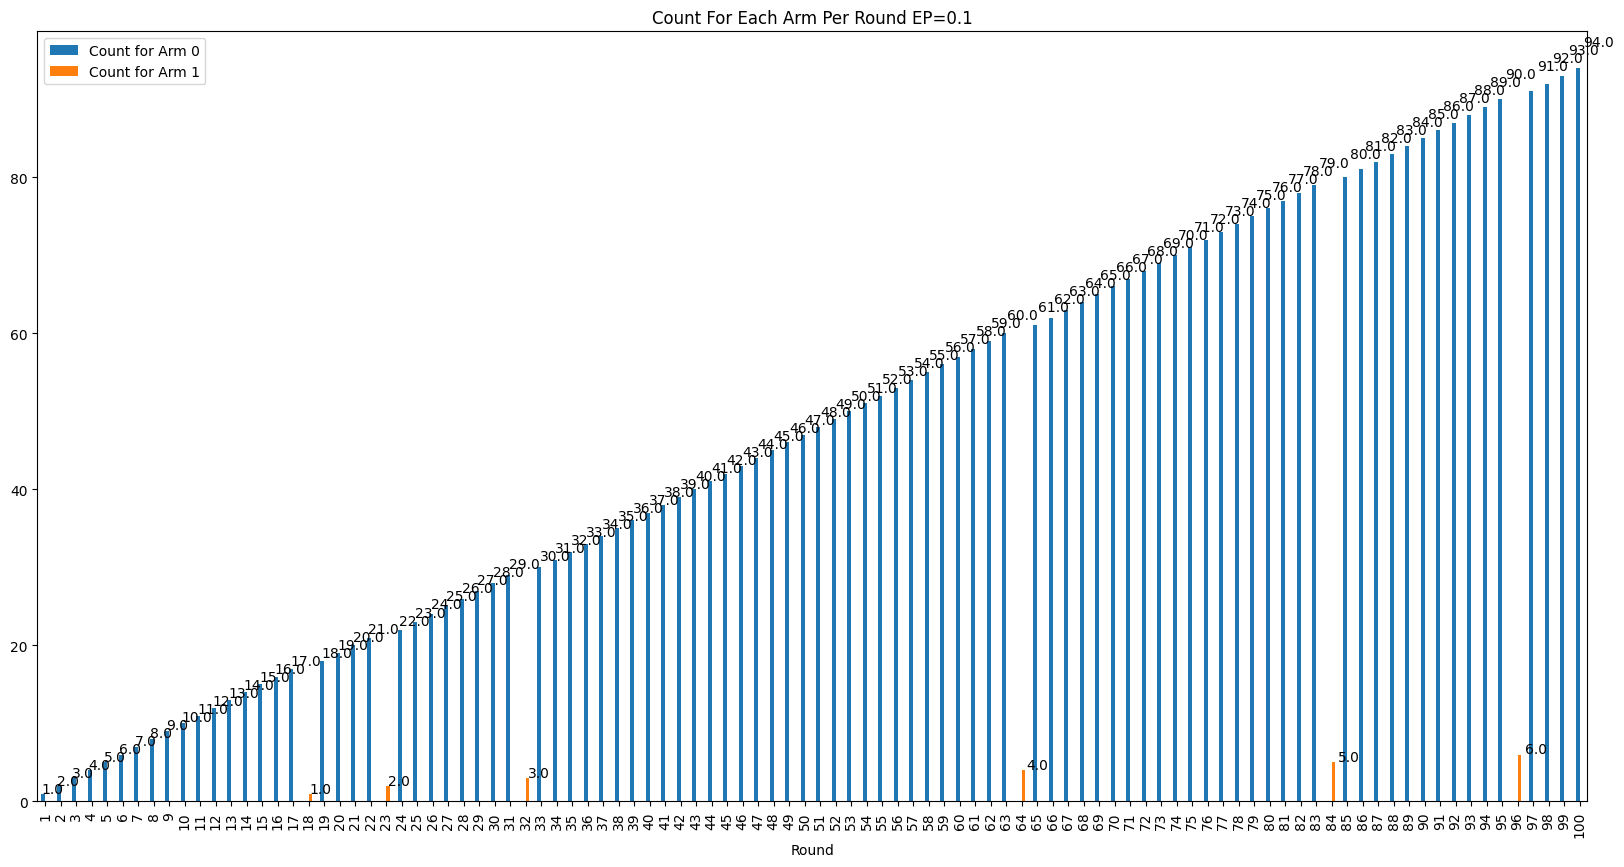

In [89]:
ax = df1.plot(x="Round", y=["Count for Arm 0", "Count for Arm 1"], kind="bar", figsize=(20, 10))
ax.set_title('Count For Each Arm Per Round EP=0.1')
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
plt.show()

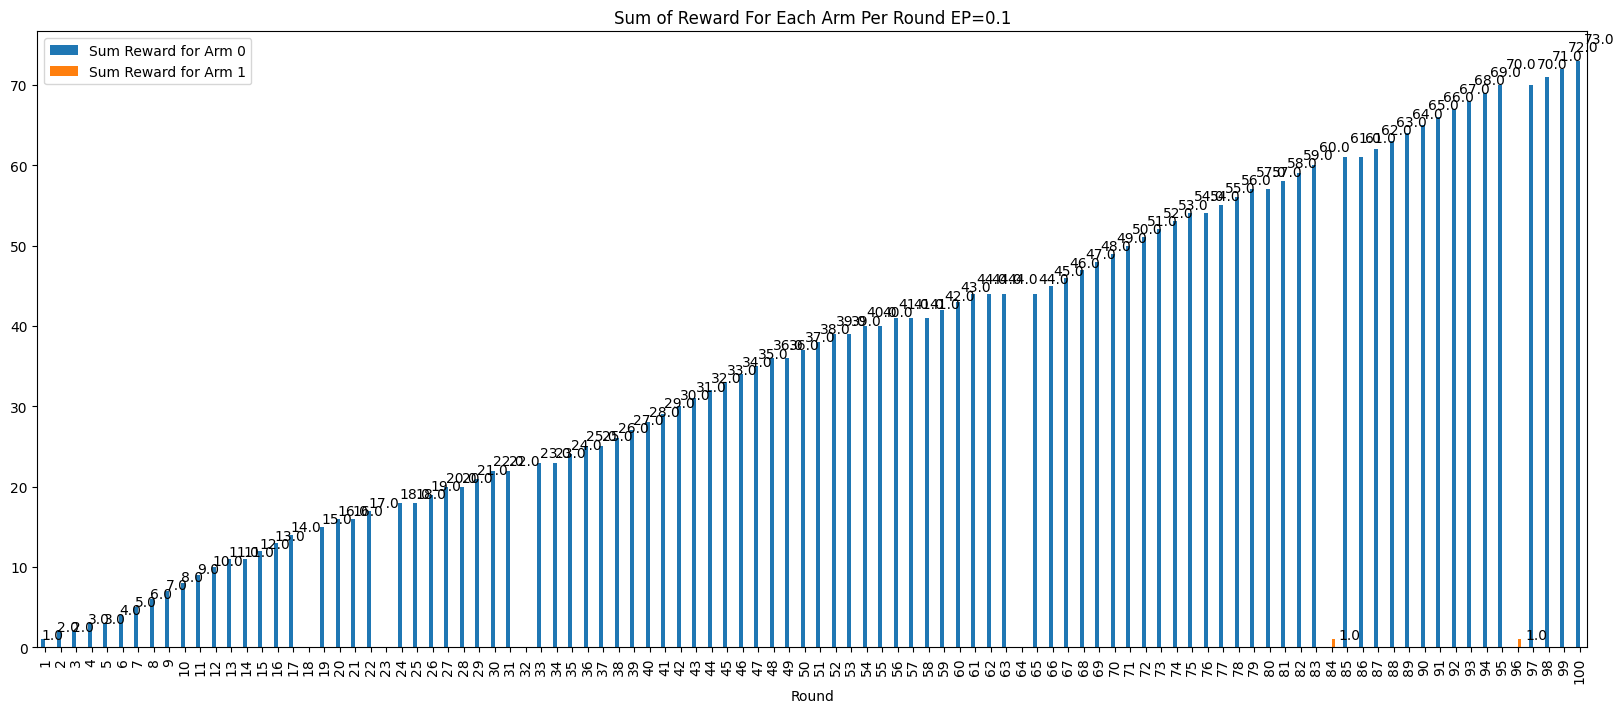

In [90]:
ax = df1.plot(x="Round", y=["Sum Reward for Arm 0", "Sum Reward for Arm 1"], kind="bar", figsize=(20, 8))
ax.set_title('Sum of Reward For Each Arm Per Round EP=0.1')
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
plt.show()

## When Epsilon is 1/currentround per round

In [91]:
count = np.zeros(2)
sum_rewards = np.zeros(2)
Q = np.zeros(2)
env.reset()

def epsilon_greedy(epsilon):

    if np.random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q)
    
df1 = pd.DataFrame(columns=['Round','Arm','Next State',
                            'Reward','Done','Info','Count[arm]',
                            'Sum Reward[arm]','Q[arm]','Count for Arm 0',
                            'Count for Arm 1','Sum Reward for Arm 0','Sum Reward for Arm 1',
                            'Q for arm 0','Q for arm 1'])

for i in range(num_rounds):
    
    divide_by_cr = 1 / (i+1)
    arm = epsilon_greedy(epsilon=divide_by_cr)
    next_state, reward, done, info = env.step(arm)
    count[arm] += 1
    sum_rewards[arm]+=reward
    Q[arm] = sum_rewards[arm]/count[arm]
    
    print("Round:           ", i+1)
    print("Arm:             ", arm)
    print("Next State:      ", next_state)
    print("Reward:          ", reward)
    print("Done:            ", done)
    print("Info:            ", info)
    print("Count[arm]:      ", count[arm])
    print("Sum Reward[arm]: ", sum_rewards[arm])
    print("Q[arm]:          ", Q[arm])
    
    if arm == 0:
        Count_for_Arm_0 = count[arm]
        Sum_Reward_for_Arm_0 = sum_rewards[arm]
        Q_for_arm_0 = Q[arm]
        
    else:
        Count_for_Arm_0 = 0
        Sum_Reward_for_Arm_0 = 0
        Q_for_arm_0 = 0
        
    if arm == 1:
        Count_for_Arm_1 = count[arm]
        Sum_Reward_for_Arm_1 = sum_rewards[arm]
        Q_for_arm_1 = Q[arm]
        
    else:
        Count_for_Arm_1 = 0
        Sum_Reward_for_Arm_1 = 0
        Q_for_arm_1 = 0
        
    print(" ")
    
    infoList = [i+1, arm, next_state, reward, done, info, count[arm], sum_rewards[arm], Q[arm], Count_for_Arm_0, Count_for_Arm_1, Sum_Reward_for_Arm_0, Sum_Reward_for_Arm_1, Q_for_arm_0, Q_for_arm_1]
    
    df1.loc[len(df1)] = infoList

Round:            1
Arm:              1
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       1.0
Sum Reward[arm]:  1.0
Q[arm]:           1.0
 
Round:            2
Arm:              1
Next State:       0
Reward:           0
Done:             True
Info:             {}
Count[arm]:       2.0
Sum Reward[arm]:  1.0
Q[arm]:           0.5
 
Round:            3
Arm:              1
Next State:       0
Reward:           0
Done:             True
Info:             {}
Count[arm]:       3.0
Sum Reward[arm]:  1.0
Q[arm]:           0.3333333333333333
 
Round:            4
Arm:              1
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       4.0
Sum Reward[arm]:  2.0
Q[arm]:           0.5
 
Round:            5
Arm:              1
Next State:       0
Reward:           1
Done:             True
Info:             {}
Count[arm]:       5.0
Sum Reward[arm]:  3.0
Q[arm]:           0.6
 
Round:            6
Arm: 

In [92]:
print(Q)
print('The optimal arm is arm {}'.format(np.argmax(Q)))
resultsList.append([Q,np.argmax(Q),'1/r'])

[0.80681818 0.41666667]
The optimal arm is arm 0


#### Epsilon = 1/currentround Graph Result

In [93]:
#df1

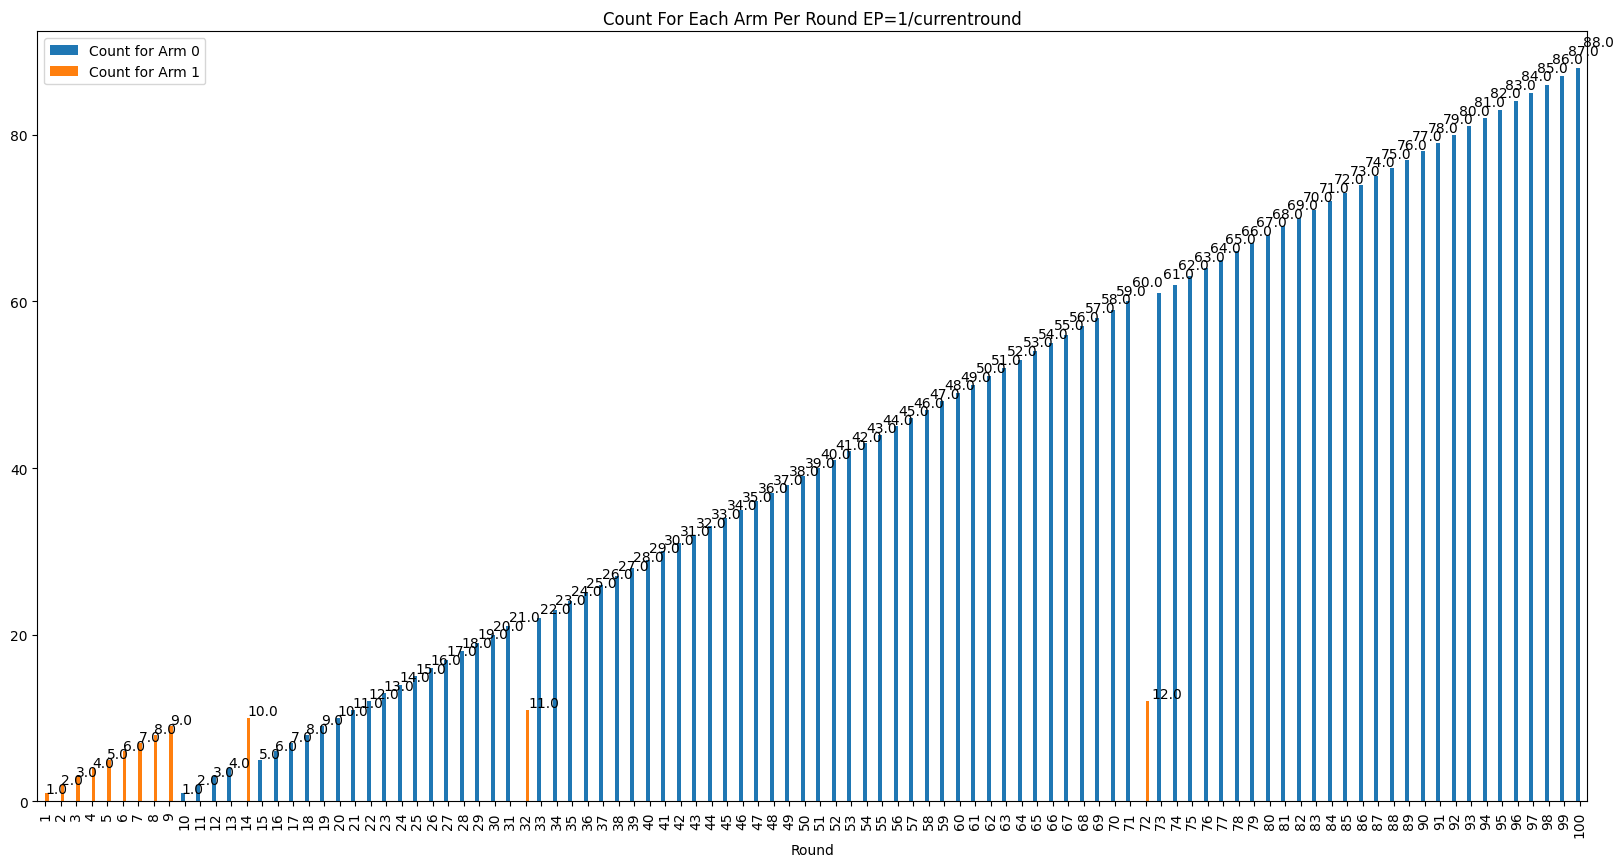

In [94]:
ax = df1.plot(x="Round", y=["Count for Arm 0", "Count for Arm 1"], kind="bar", figsize=(20, 10))
ax.set_title('Count For Each Arm Per Round EP=1/currentround')
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
plt.show()

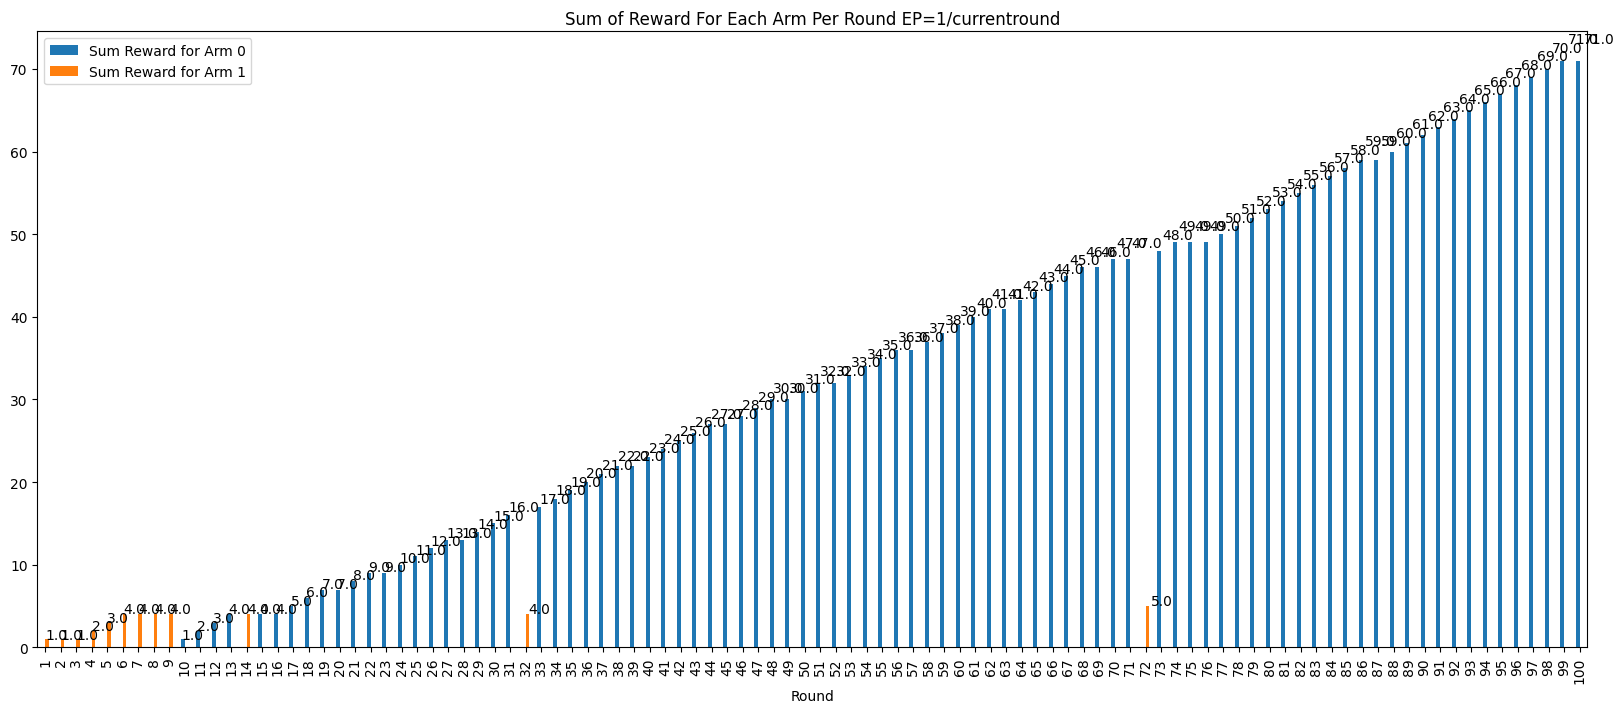

In [95]:
ax = df1.plot(x="Round", y=["Sum Reward for Arm 0", "Sum Reward for Arm 1"], kind="bar", figsize=(20, 8))
ax.set_title('Sum of Reward For Each Arm Per Round EP=1/currentround')
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
plt.show()

## Results

In [96]:
for result in resultsList:
    print("Epsilon: "+ str(result[2]) + " Q: " + str(result[0]) + ", Best arm: " + str(result[1]))

Epsilon: 0.5 Q: [0.76315789 0.20833333], Best arm: 0
Epsilon: 0.3 Q: [0.80681818 0.16666667], Best arm: 0
Epsilon: 0.1 Q: [0.77659574 0.16666667], Best arm: 0
Epsilon: 1/r Q: [0.80681818 0.41666667], Best arm: 0
